#<center>**Adventurework 2012 with Python**</center>
#<center>**K Mean RFM**</center>

**Data**: https://docs.microsoft.com/en-us/sql/samples/adventureworks-install-configure?view=sql-server-ver15&tabs=ssms

###**Library**

In [1]:
# import library
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from sklearn import datasets
import warnings
from datetime import datetime
from datetime import date
warnings.filterwarnings("ignore")

###**Load data**

In [2]:
# Load data from github
# File customer
url1 = 'https://raw.githubusercontent.com/syo2000/Adventurework-2012-with-Python/main/customer.csv'
df1 = pd.read_csv(url1)
df1.head()

,CustomerKey,GeographyKey,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,Suffix,Gender,EmailAddress,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,SpanishEducation,FrenchEducation,EnglishOccupation,SpanishOccupation,FrenchOccupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CommuteDistance,GeographyKey.1,City,StateProvinceCode,StateProvinceName,CountryRegionCode,EnglishCountryRegionName,SpanishCountryRegionName,FrenchCountryRegionName,PostalCode,SalesTerritoryKey,IpAddressLocator
0,11000,26,AW00011000,NaN,Jon,V,Yang,0,1971-10-06,M,NaN,M,jon24@adventure-works.com,90000.0,2,0,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,1,0,3761 N. 14th St,NaN,1 (11) 500 555-0162,2011-01-19,1-2 Miles,26,Rockhampton,QLD,Queensland,AU,Australia,Australia,Australie,4700,9,198.51.100.27
1,11001,37,AW00011001,NaN,Eugene,L,Huang,0,1976-05-10,S,NaN,M,eugene10@adventure-works.com,60000.0,3,3,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,0,1,2243 W St.,NaN,1 (11) 500 555-0110,2011-01-15,0-1 Miles,37,Seaford,VIC,Victoria,AU,Australia,Australia,Australie,3198,9,198.51.100.38
2,11002,31,AW00011002,NaN,Ruben,NaN,Torres,0,1971-02-09,M,NaN,M,ruben35@adventure-works.com,60000.0,3,3,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,1,1,5844 Linden Land,NaN,1 (11) 500 555-0184,2011-01-07,2-5 Miles,31,Hobart,TAS,Tasmania,AU,Australia,Australia,Australie,7001,9,198.51.100.32
3,11003,11,AW00011003,NaN,Christy,NaN,Zhu,0,1973-08-14,S,NaN,F,christy12@adventure-works.com,70000.0,0,0,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,0,1,1825 Village Pl.,NaN,1 (11) 500 555-0162,2010-12-29,5-10 Miles,11,North Ryde,NSW,New South Wales,AU,Australia,Australia,Australie,2113,9,198.51.100.12
4,11004,19,AW00011004,NaN,Elizabeth,NaN,Johnson,0,1979-08-05,S,NaN,F,elizabeth5@adventure-works.com,80000.0,5,5,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,1,4,7553 Harness Circle,NaN,1 (11) 500 555-0131,2011-01-23,1-2 Miles,19,Wollongong,NSW,New South Wales,AU,Australia,Australia,Australie,2500,9,198.51.100.20


In [3]:
# File factinternetsales
url2 = 'https://raw.githubusercontent.com/syo2000/Adventurework-2012-with-Python/main/factinternetsales.csv'
df2 = pd.read_csv(url2)
df2

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,RevisionNumber,OrderQuantity,UnitPrice,ExtendedAmount,UnitPriceDiscountPct,DiscountAmount,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate
0,310,20101229,20110110,20110105,21768,1,19,6,SO43697,1,1,1,3578.2700,3578.2700,0,0,2171.2942,2171.2942,3578.2700,286.2616,89.4568,NaN,NaN,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000
1,346,20101229,20110110,20110105,28389,1,39,7,SO43698,1,1,1,3399.9900,3399.9900,0,0,1912.1544,1912.1544,3399.9900,271.9992,84.9998,NaN,NaN,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000
2,346,20101229,20110110,20110105,25863,1,100,1,SO43699,1,1,1,3399.9900,3399.9900,0,0,1912.1544,1912.1544,3399.9900,271.9992,84.9998,NaN,NaN,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000
3,336,20101229,20110110,20110105,14501,1,100,4,SO43700,1,1,1,699.0982,699.0982,0,0,413.1463,413.1463,699.0982,55.9279,17.4775,NaN,NaN,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000
4,346,20101229,20110110,20110105,11003,1,6,9,SO43701,1,1,1,3399.9900,3399.9900,0,0,1912.1544,1912.1544,3399.9900,271.9992,84.9998,NaN,NaN,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60393,485,20140128,20140209,20140204,15868,1,100,6,SO75122,1,1,1,21.9800,21.9800,0,0,8.2205,8.2205,21.9800,1.7584,0.5495,NaN,NaN,2014-01-28 00:00:00.000,2014-02-09 00:00:00.000,2014-02-04 00:00:00.000
60394,225,20140128,20140209,20140204,15868,1,100,6,SO75122,2,1,1,8.9900,8.9900,0,0,6.9223,6.9223,8.9900,0.7192,0.2248,NaN,NaN,2014-01-28 00:00:00.000,2014-02-09 00:00:00.000,2014-02-04 00:00:00.000
60395,485,20140128,20140209,20140204,18759,1,100,6,SO75123,1,1,1,21.9800,21.9800,0,0,8.2205,8.2205,21.9800,1.7584,0.5495,NaN,NaN,2014-01-28 00:00:00.000,2014-02-09 00:00:00.000,2014-02-04 00:00:00.000
60396,486,20140128,20140209,20140204,18759,1,100,6,SO75123,2,1,1,159.0000,159.0000,0,0,59.4660,59.4660,159.0000,12.7200,3.9750,NaN,NaN,2014-01-28 00:00:00.000,2014-02-09 00:00:00.000,2014-02-04 00:00:00.000


###**Understanding data**

* Number of rows of columns data
* Descriptive statistics data
* Data overview

**Number of rows of columns data**

In [4]:
# File customer
print("Rows:",f"{df1.shape[0]} instances")
print ("Columns:",f"{df1.shape[1]} attributes")

Rows: 18484 instances
Columns: 40 attributes


In [5]:
# File factinternetsales
print("Rows:",f"{df2.shape[0]} instances")
print ("Columns:",f"{df2.shape[1]} attributes")

Rows: 60398 instances
Columns: 26 attributes


**Descriptive statistics data**

In [6]:
# File customer
df1.describe()

,CustomerKey,GeographyKey,NameStyle,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,GeographyKey.1,SalesTerritoryKey
count,18484.000000,18484.000000,18484.0,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000
mean,20241.500000,257.956287,0.0,57305.777970,1.844352,1.004058,0.676369,1.502705,257.956287,5.898399
std,5336.015523,196.531062,0.0,32285.841703,1.612408,1.522660,0.467874,1.138394,196.531062,3.061200
min,11000.000000,2.000000,0.0,10000.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,15620.750000,62.000000,0.0,30000.000000,0.000000,0.000000,0.000000,1.000000,62.000000,4.000000
50%,20241.500000,240.000000,0.0,60000.000000,2.000000,0.000000,1.000000,2.000000,240.000000,6.000000
75%,24862.250000,345.000000,0.0,70000.000000,3.000000,2.000000,1.000000,2.000000,345.000000,9.000000
max,29483.000000,654.000000,0.0,170000.000000,5.000000,5.000000,1.000000,4.000000,654.000000,10.000000


In [7]:
# File factinternetsales
df2.describe()

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderLineNumber,RevisionNumber,OrderQuantity,UnitPrice,ExtendedAmount,UnitPriceDiscountPct,DiscountAmount,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber
count,60398.000000,6.039800e+04,6.039800e+04,6.039800e+04,60398.000000,60398.000000,60398.000000,60398.000000,60398.000000,60398.0,60398.0,60398.000000,60398.000000,60398.0,60398.0,60398.000000,60398.000000,60398.000000,60398.000000,60398.000000,0.0,0.0
mean,437.557932,2.012973e+07,2.013010e+07,2.012994e+07,18841.685420,1.041839,69.845326,6.244462,1.886321,1.0,1.0,486.086911,486.086911,0.0,0.0,286.065657,286.065657,486.086911,38.886954,12.152217,NaN,NaN
std,118.088390,4.745050e+03,4.985453e+03,4.851061e+03,5432.430404,0.342605,42.146363,2.961150,1.016328,0.0,0.0,928.489892,928.489892,0.0,0.0,552.457641,552.457641,928.489892,74.279193,23.212248,NaN,NaN
min,214.000000,2.010123e+07,2.011011e+07,2.011010e+07,11000.000000,1.000000,6.000000,1.000000,1.000000,1.0,1.0,2.290000,2.290000,0.0,0.0,0.856500,0.856500,2.290000,0.183200,0.057300,NaN,NaN
25%,359.000000,2.013040e+07,2.013042e+07,2.013041e+07,14003.000000,1.000000,19.000000,4.000000,1.000000,1.0,1.0,7.950000,7.950000,0.0,0.0,2.973300,2.973300,7.950000,0.636000,0.198800,NaN,NaN
50%,479.000000,2.013071e+07,2.013073e+07,2.013072e+07,18143.000000,1.000000,100.000000,7.000000,2.000000,1.0,1.0,29.990000,29.990000,0.0,0.0,11.216300,11.216300,29.990000,2.399200,0.749800,NaN,NaN
75%,529.000000,2.013102e+07,2.013103e+07,2.013102e+07,23429.750000,1.000000,100.000000,9.000000,2.000000,1.0,1.0,539.990000,539.990000,0.0,0.0,294.579700,294.579700,539.990000,43.199200,13.499800,NaN,NaN
max,606.000000,2.014013e+07,2.014021e+07,2.014020e+07,29483.000000,14.000000,100.000000,10.000000,8.000000,1.0,1.0,3578.270000,3578.270000,0.0,0.0,2171.294200,2171.294200,3578.270000,286.261600,89.456800,NaN,NaN


**Data overview**

In [8]:
# File customer
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerKey               18484 non-null  int64  
 1   GeographyKey              18484 non-null  int64  
 2   CustomerAlternateKey      18484 non-null  object 
 3   Title                     101 non-null    object 
 4   FirstName                 18484 non-null  object 
 5   MiddleName                10654 non-null  object 
 6   LastName                  18484 non-null  object 
 7   NameStyle                 18484 non-null  int64  
 8   BirthDate                 18484 non-null  object 
 9   MaritalStatus             18484 non-null  object 
 10  Suffix                    3 non-null      object 
 11  Gender                    18484 non-null  object 
 12  EmailAddress              18484 non-null  object 
 13  YearlyIncome              18484 non-null  float64
 14  TotalC

In [9]:
# File factinternetsales
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398 entries, 0 to 60397
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ProductKey             60398 non-null  int64  
 1   OrderDateKey           60398 non-null  int64  
 2   DueDateKey             60398 non-null  int64  
 3   ShipDateKey            60398 non-null  int64  
 4   CustomerKey            60398 non-null  int64  
 5   PromotionKey           60398 non-null  int64  
 6   CurrencyKey            60398 non-null  int64  
 7   SalesTerritoryKey      60398 non-null  int64  
 8   SalesOrderNumber       60398 non-null  object 
 9   SalesOrderLineNumber   60398 non-null  int64  
 10  RevisionNumber         60398 non-null  int64  
 11  OrderQuantity          60398 non-null  int64  
 12  UnitPrice              60398 non-null  float64
 13  ExtendedAmount         60398 non-null  float64
 14  UnitPriceDiscountPct   60398 non-null  int64  
 15  Di

###**Remove columns**

In [10]:
# File customer
df1.drop(columns=['Title','Suffix','AddressLine2','SpanishEducation','FrenchEducation','SpanishOccupation','FrenchOccupation',
                  'GeographyKey.1','SpanishCountryRegionName','FrenchCountryRegionName','StateProvinceCode','StateProvinceName',
                  'CountryRegionCode','SpanishCountryRegionName','FrenchCountryRegionName','NameStyle','FirstName','MiddleName',
                  'LastName','PostalCode','IpAddressLocator','Phone','EmailAddress','AddressLine1','SalesTerritoryKey'], inplace=True)
df1.head()

,CustomerKey,GeographyKey,CustomerAlternateKey,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,NumberCarsOwned,DateFirstPurchase,CommuteDistance,City,EnglishCountryRegionName
0,11000,26,AW00011000,1971-10-06,M,M,90000.0,2,0,Bachelors,Professional,1,0,2011-01-19,1-2 Miles,Rockhampton,Australia
1,11001,37,AW00011001,1976-05-10,S,M,60000.0,3,3,Bachelors,Professional,0,1,2011-01-15,0-1 Miles,Seaford,Australia
2,11002,31,AW00011002,1971-02-09,M,M,60000.0,3,3,Bachelors,Professional,1,1,2011-01-07,2-5 Miles,Hobart,Australia
3,11003,11,AW00011003,1973-08-14,S,F,70000.0,0,0,Bachelors,Professional,0,1,2010-12-29,5-10 Miles,North Ryde,Australia
4,11004,19,AW00011004,1979-08-05,S,F,80000.0,5,5,Bachelors,Professional,1,4,2011-01-23,1-2 Miles,Wollongong,Australia


In [11]:
# File factinternetsales
df2.drop(columns=['CarrierTrackingNumber','CustomerPONumber'], inplace=True)
df2.head()

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,RevisionNumber,OrderQuantity,UnitPrice,ExtendedAmount,UnitPriceDiscountPct,DiscountAmount,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,OrderDate,DueDate,ShipDate
0,310,20101229,20110110,20110105,21768,1,19,6,SO43697,1,1,1,3578.2700,3578.2700,0,0,2171.2942,2171.2942,3578.2700,286.2616,89.4568,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000
1,346,20101229,20110110,20110105,28389,1,39,7,SO43698,1,1,1,3399.9900,3399.9900,0,0,1912.1544,1912.1544,3399.9900,271.9992,84.9998,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000
2,346,20101229,20110110,20110105,25863,1,100,1,SO43699,1,1,1,3399.9900,3399.9900,0,0,1912.1544,1912.1544,3399.9900,271.9992,84.9998,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000
3,336,20101229,20110110,20110105,14501,1,100,4,SO43700,1,1,1,699.0982,699.0982,0,0,413.1463,413.1463,699.0982,55.9279,17.4775,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000
4,346,20101229,20110110,20110105,11003,1,6,9,SO43701,1,1,1,3399.9900,3399.9900,0,0,1912.1544,1912.1544,3399.9900,271.9992,84.9998,2010-12-29 00:00:00.000,2011-01-10 00:00:00.000,2011-01-05 00:00:00.000


###**Prepare data**

* Format
* Create RFM
* Check missing value
* Check duplicate
* Check outlier
* Histogram chart
* Fix Histogram chart
* Scaling the RFM data

In [12]:
# Create dataframe new
X = df2[['CustomerKey','OrderDate','SalesOrderNumber', 'SalesOrderLineNumber','OrderQuantity', 'SalesAmount']]
X.head()

,CustomerKey,OrderDate,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,SalesAmount
0,21768,2010-12-29 00:00:00.000,SO43697,1,1,3578.2700
1,28389,2010-12-29 00:00:00.000,SO43698,1,1,3399.9900
2,25863,2010-12-29 00:00:00.000,SO43699,1,1,3399.9900
3,14501,2010-12-29 00:00:00.000,SO43700,1,1,699.0982
4,11003,2010-12-29 00:00:00.000,SO43701,1,1,3399.9900


**Format**

In [13]:
# Convert OrderDate, DueDate to datatime
X['OrderDate'] = pd.to_datetime(df2['OrderDate'], errors='coerce')
X['DueDate'] = pd.to_datetime(df2['DueDate'], errors='coerce')

**RFM**

* Recency: How recently has the customer made a transaction with us
* Frequency: How frequent is the customer in ordering/buying some product from us
* Monetary: How much does the customer spend on purchasing products from us.

In [14]:
# create Monetary
M = X
M = M.groupby(by='CustomerKey',as_index=False)['SalesAmount'].sum()
M.columns = ['CustomerKey','Monetary']
M.head()

,CustomerKey,Monetary
0,11000,8248.99
1,11001,6383.88
2,11002,8114.04
3,11003,8139.29
4,11004,8196.01


In [15]:
# create Frequency
F = X
F = F.groupby(by='CustomerKey', as_index=False)['SalesOrderLineNumber'].nunique()
F.columns = ['CustomerKey','Frequency']
F.head()

,CustomerKey,Frequency
0,11000,5
1,11001,6
2,11002,2
3,11003,4
4,11004,3


In [16]:
#create Recency
R  = X[['CustomerKey','OrderDate']]
# Finding max data
maximum = max(R.OrderDate)
# Adding one more day to the max data, so that the max date will have 1 as the difference and not zero.
maximum = maximum + pd.DateOffset(days=1)
R['diff'] = maximum - R.OrderDate
R.head()

,CustomerKey,OrderDate,diff
0,21768,2010-12-29,1127 days
1,28389,2010-12-29,1127 days
2,25863,2010-12-29,1127 days
3,14501,2010-12-29,1127 days
4,11003,2010-12-29,1127 days


In [17]:
# recency by customerid
a = R.groupby('CustomerKey')

In [18]:
k = a['diff'].min()
k

CustomerKey
11000   271 days
11001    50 days
11002   340 days
11003   264 days
11004   273 days
          ...   
29479   512 days
29480   196 days
29481   900 days
29482   498 days
29483   507 days
Name: diff, Length: 18484, dtype: timedelta64[ns]

In [19]:
# Dataframe merging by recency
df = pd.DataFrame(k)
df = df.reset_index()
df.columns = ["CustomerKey", "Recency"]
df.head()

,CustomerKey,Recency
0,11000,271 days
1,11001,50 days
2,11002,340 days
3,11003,264 days
4,11004,273 days


In [20]:
#create RFM
RFM = F.merge(M, on = "CustomerKey")
RFM = RFM.merge(df, on = "CustomerKey")
RFM.head()

,CustomerKey,Frequency,Monetary,Recency
0,11000,5,8248.99,271 days
1,11001,6,6383.88,50 days
2,11002,2,8114.04,340 days
3,11003,4,8139.29,264 days
4,11004,3,8196.01,273 days


In [21]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18484 entries, 0 to 18483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   CustomerKey  18484 non-null  int64          
 1   Frequency    18484 non-null  int64          
 2   Monetary     18484 non-null  float64        
 3   Recency      18484 non-null  timedelta64[ns]
dtypes: float64(1), int64(2), timedelta64[ns](1)
memory usage: 722.0 KB


In [22]:
# Format lại Recency từ datetime64 sang int
# Format Recency from datatime64 to int
RFM['Recency'] = RFM.Recency.dt.days

In [23]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18484 entries, 0 to 18483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CustomerKey  18484 non-null  int64  
 1   Frequency    18484 non-null  int64  
 2   Monetary     18484 non-null  float64
 3   Recency      18484 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 722.0 KB


**Missing value**

In [24]:
#thống kê theo missing value %
# Mising value
RFM.isnull().sum().sort_values(ascending=False)
for column in RFM.columns:
  per = RFM[column].isna().mean()
  print(f'{column}: {round(per*100,2)}%')

CustomerKey: 0.0%
Frequency: 0.0%
Monetary: 0.0%
Recency: 0.0%


**Duplicate**

In [25]:
# Tìm dữ liệu bị duplicate
RFM.duplicated().sum()

0

**Outlier**

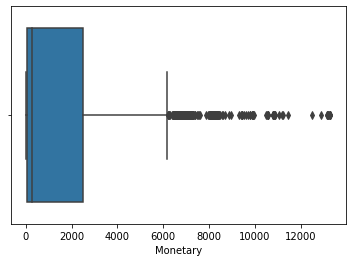

In [26]:
# outlier Monetary
sns.boxplot(RFM.Monetary)
Q1 = RFM.Monetary.quantile(0.25)
Q3 = RFM.Monetary.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Monetary >= (Q1 - 1.5*IQR)) & (RFM.Monetary <= (Q3 + 1.5*IQR))]

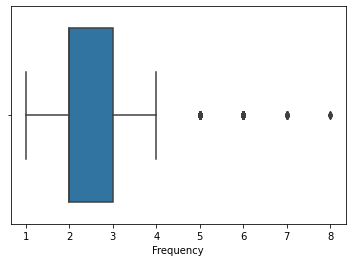

In [27]:
# outlier Frequency
sns.boxplot(RFM.Frequency)
Q1 = RFM.Frequency.quantile(0.25)
Q3 = RFM.Frequency.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Frequency >= Q1 - 1.5*IQR) & (RFM.Frequency <= Q3 + 1.5*IQR)]

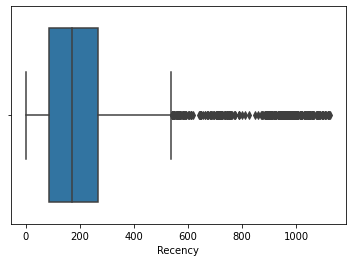

In [28]:
# outlier Recency
sns.boxplot(RFM.Recency)
Q1 = RFM.Recency.quantile(0.25)
Q3 = RFM.Recency.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Recency >= Q1 - 1.5*IQR) & (RFM.Recency <= Q3 + 1.5*IQR)]

**Histogram chart**

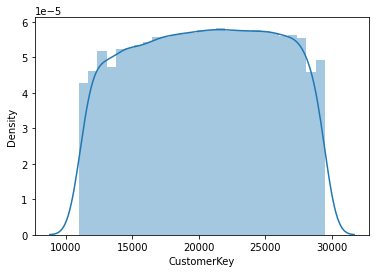

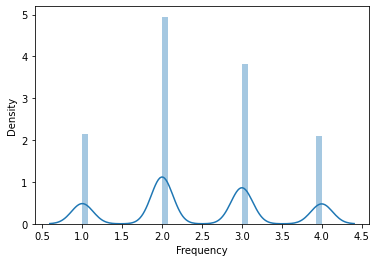

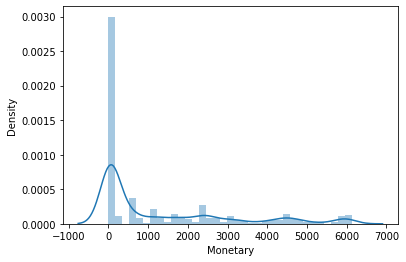

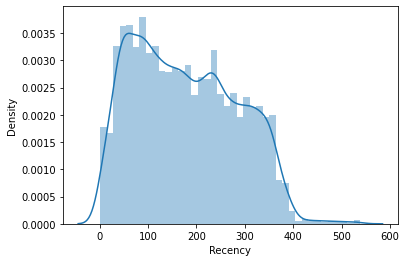

In [29]:
for i in RFM:
    sns.distplot(RFM[i])
    plt.show()

**Fix skewed chart**

In [30]:
# Fix RFM
RFM['Monetary'] = np.log(RFM['Monetary']+1) #+1 cause the log here takes a negative value
RFM['Recency'] = np.log(RFM['Recency']+1)

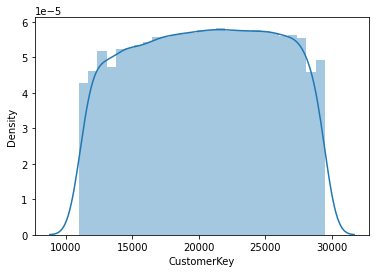

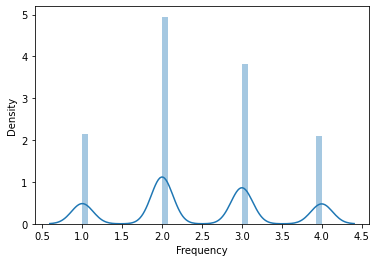

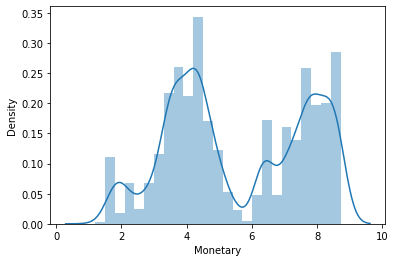

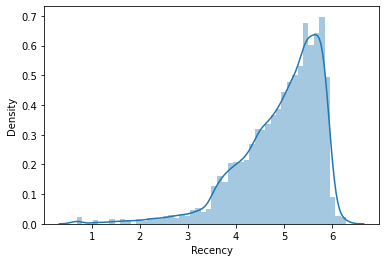

In [31]:
for i in RFM:
    sns.distplot(RFM[i])
    plt.show()

**Scaling the RFM data - Chuẩn hóa**

In [32]:
# standardise all parameters
RFM_norm1 = RFM.drop(["CustomerKey"], axis=1)

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
RFM_norm1 = standard_scaler.fit_transform(RFM_norm1)

In [33]:
RFM_norm1 = pd.DataFrame(RFM_norm1)
RFM_norm1.columns = ['Frequency','Amount','Recency']
RFM_norm1.head()

,Frequency,Amount,Recency
0,0.576800,-0.547511,-0.296763
1,0.576800,-0.388535,-3.203723
2,1.630799,-0.296806,0.811654
3,0.576800,1.074523,1.182097
4,0.576800,1.041368,1.111493


### **Find the optimal number of clusters**

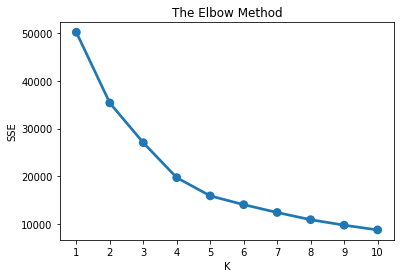

In [34]:
# import library
from sklearn.cluster import KMeans


#fit KMeans and calculate SSE for each K
sse = {}
for k in range(1,11):
	kmeans = KMeans(n_clusters = k, random_state=1)
	kmeans.fit(RFM_norm1)
	sse[k] = kmeans.inertia_ 

#plot SSE for each K
plt.title('The Elbow Method')
plt.xlabel('K'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show() 

### **K mean**

In [35]:
#Thuật toán K mean
# Kmean
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

     #Extract cluster labels
    cluster_labels = kmeans.labels_
        
     #Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)  
    return df_new

In [36]:
df_rfm_k4 = kmeans(RFM_norm1, 4, RFM)

In [37]:
# Chart scatter 3 chiều
# Chart scatter 3D
import plotly.express as px
from plotly.offline import iplot
def chartkmean(k): 
  fig = px.scatter_3d(k, x='Recency', 
                   y='Frequency', z='Monetary', 
                   color='Cluster')
  iplot(fig) 

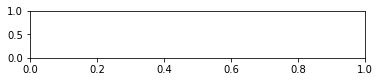

In [38]:
plt.subplot(4, 1, 2)
chartkmean(df_rfm_k4)

**Analyzing average RFM values of each cluster**

In [39]:
def rfm_values(df):

    df_new = df.groupby(['Cluster']).agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': ['mean', 'count']
    }).round(0)
    
    return df_new

In [40]:
rfm_values(df_rfm_k4)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0           3.0       2.0      4.0  2212
1           5.0       2.0      4.0  6272
2           5.0       2.0      8.0  3634
3           5.0       4.0      7.0  4602

In [41]:
# Thông tin các khách hàng ở cụm thứ 4
# Information of customers in the 4th cluster
df_rfm_k4[df_rfm_k4['Cluster'] == 3]

,CustomerKey,Frequency,Monetary,Recency,Cluster
14,11014,4,4.937706,5.616771,3
15,11015,3,7.824834,5.932245,3
16,11016,3,7.755030,5.872118,3
21,11021,3,7.771893,5.918894,3
40,11040,3,7.763004,5.710427,3
...,...,...,...,...,...
18464,29464,3,6.629799,4.672829,3
18465,29465,4,6.674965,4.624973,3
18468,29468,3,7.795256,5.480639,3
18477,29477,3,7.795256,5.420535,3


In [42]:
# Information of customers with ID 11015
df1[df1['CustomerKey'] == 11015	]

,CustomerKey,GeographyKey,CustomerAlternateKey,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,NumberCarsOwned,DateFirstPurchase,CommuteDistance,City,EnglishCountryRegionName
15,11015,301,AW00011015,1984-08-26,S,F,30000.0,0,0,Partial College,Skilled Manual,0,1,2013-01-18,5-10 Miles,Burbank,United States
